In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
customer = pd.read_csv('/Users/AnhHuynh/Documents/Data Analyst portfolio/Projects/UNSUPERVISED ML/Mall_Customers.csv')

In [3]:
customer.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
# Check for missing data
customer.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [5]:
# Check data type
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


## UNIVARIATE ANALYSIS

* Univariate analysis looks at one variable at a time

In [6]:
customer.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
import seaborn as sns

In [8]:
customer.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [9]:
columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

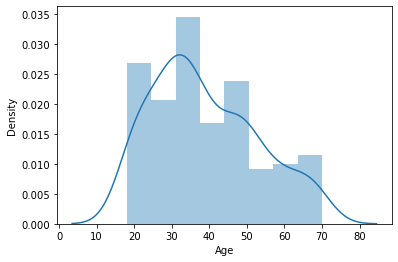

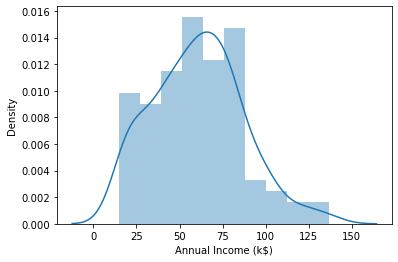

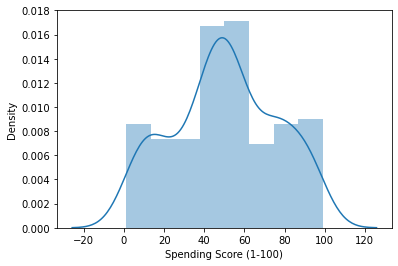

In [10]:
for column in columns:
    plt.figure()
    sns.distplot(customer[column])

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Density'>

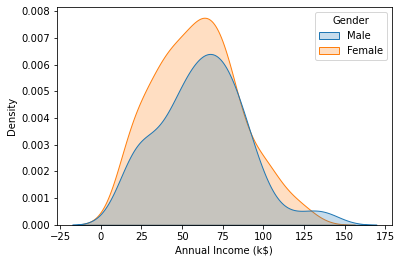

In [11]:
sns.kdeplot(x=customer['Annual Income (k$)'],fill=True,hue=customer['Gender'])

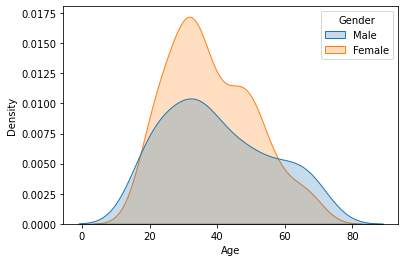

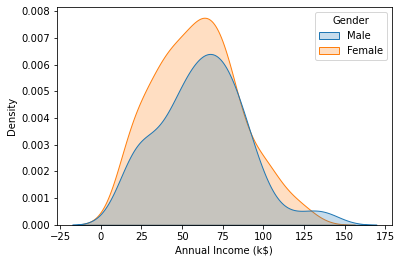

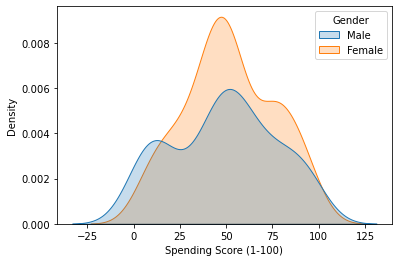

In [12]:
for column in columns:
    plt.figure()
    sns.kdeplot(x=customer[column], shade=True, hue=customer['Gender'])

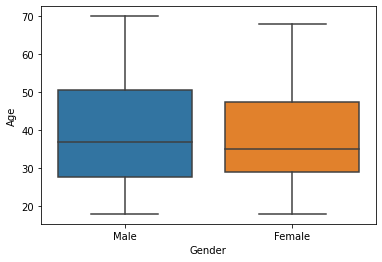

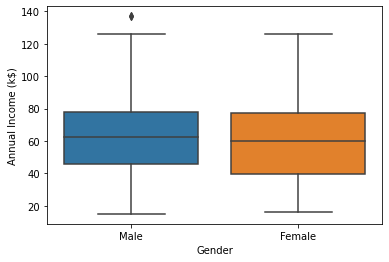

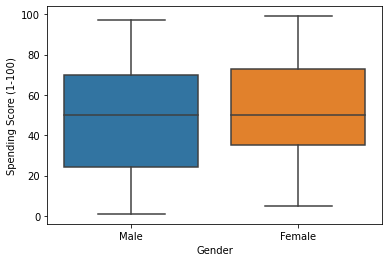

In [13]:
for column in columns:
    plt.figure()
    sns.boxplot(data=customer, x=customer['Gender'], y=customer[column])

In [14]:
customer['Gender'].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

In [15]:
customer['Gender'].value_counts(normalize=True)

Female    0.56
Male      0.44
Name: Gender, dtype: float64

## BIVARIATE ANALYSIS

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

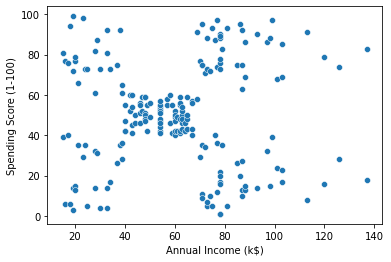

In [16]:
sns.scatterplot(x=customer['Annual Income (k$)'], y=customer['Spending Score (1-100)'])

<Figure size 1080x576 with 0 Axes>

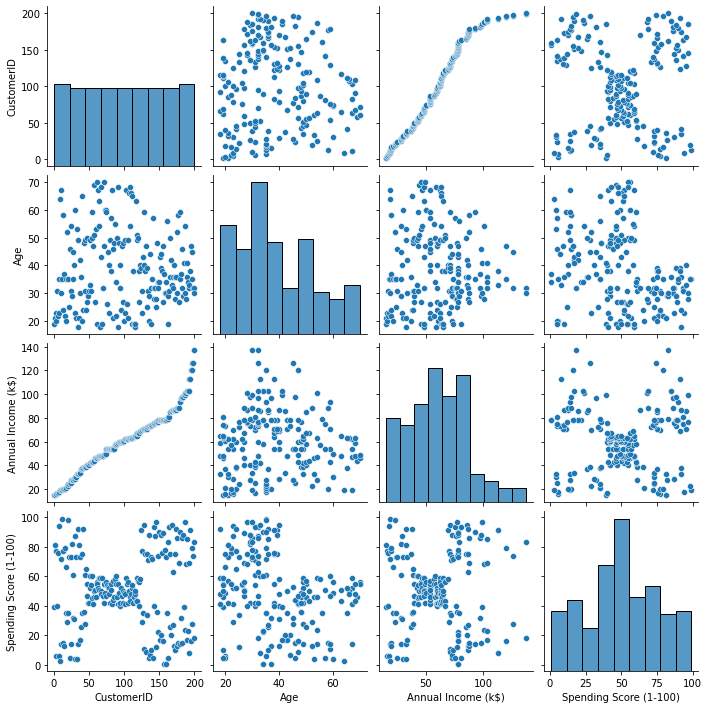

In [17]:
plt.figure(figsize=(15,8))
sns.pairplot(customer)

In [18]:
customer = customer.drop('CustomerID', axis=1)

In [19]:
customer.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


<Figure size 1080x576 with 0 Axes>

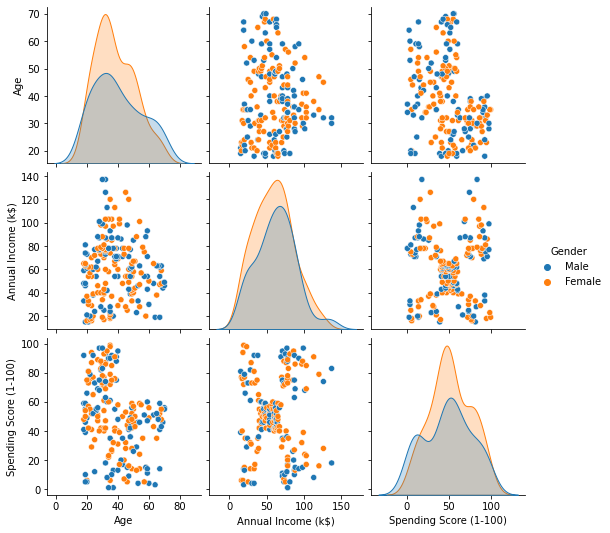

In [20]:
plt.figure(figsize=(15,8))
sns.pairplot(customer, hue='Gender')

In [21]:
customer.groupby('Gender').mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [22]:
customer.corr()

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


<AxesSubplot:>

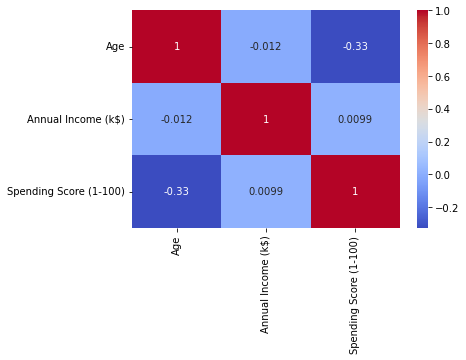

In [23]:
sns.heatmap(customer.corr(), annot=True, cmap='coolwarm')

## Clustering - Univariate, Bivariate, Multivariate

In [24]:
from sklearn.cluster import KMeans
import random

In [25]:
clustering1 = KMeans(n_clusters=3)

In [26]:
random.seed(0)
clustering1.fit(customer[['Annual Income (k$)']])

KMeans(n_clusters=3)

In [27]:
clustering1.labels_ #assign labels to each cluster

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int32)

In [28]:
# We want to assign the originial dataset with the labels created

customer['Income Labels'] = clustering1.labels_ 
customer.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Labels
0,Male,19,15,39,1
1,Male,21,15,81,1
2,Female,20,16,6,1
3,Female,23,16,77,1
4,Female,31,17,40,1


In [29]:
customer['Income Labels'].value_counts()

2    90
1    74
0    36
Name: Income Labels, dtype: int64

In [30]:
clustering1.inertia_

23517.330930930933

In [31]:
# To determine the number of clusters to be used to generate the most optimal predictions, we will test 
# different number of clusters using for loop

inertia_cluster =[]
for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(customer[['Annual Income (k$)']])
    inertia_cluster.append(kmeans.inertia_)

In [32]:
inertia_cluster

[137277.28000000003,
 48660.88888888889,
 23517.330930930933,
 13278.112713472485,
 8481.496190476191,
 5081.484660267269,
 3931.988095238095,
 2822.4996947496948,
 2190.0972210795744,
 1743.4772727272725]

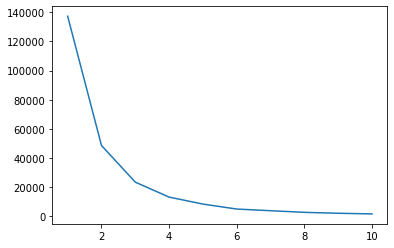

In [33]:
plt.plot(range(1,11), inertia_cluster)

In [34]:
# The elbow locator indicates that n_cluster=3 yield optimal result for this problem.

In [35]:
customer.groupby('Income Labels')['Age', 'Annual Income (k$)', 'Spending Score (1-100)'].mean()

/var/folders/4p/strpkrbd1y782g01xksphyv40000gn/T/ipykernel_25193/1431937429.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  customer.groupby('Income Labels')['Age', 'Annual Income (k$)', 'Spending Score (1-100)'].mean()


,Age,Annual Income (k$),Spending Score (1-100)
Income Labels,,,
0,37.833333,99.888889,50.638889
1,39.500000,33.486486,50.229730
2,38.722222,67.088889,50.000000


In [36]:
# Bivarate Clustering

In [37]:
clustering2 = KMeans(n_clusters=5)

In [38]:
clustering2.fit(customer[['Annual Income (k$)','Spending Score (1-100)']])

KMeans(n_clusters=5)

In [39]:
customer['Income and Spending'] = clustering2.labels_

In [40]:
customer.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Labels,Income and Spending
0,Male,19,15,39,1,0
1,Male,21,15,81,1,4
2,Female,20,16,6,1,0
3,Female,23,16,77,1,4
4,Female,31,17,40,1,0


In [41]:
inertia2_cluster =[]
for i in range(1,11):
    kmeans2 = KMeans(n_clusters=i)
    kmeans2.fit(customer[['Annual Income (k$)','Spending Score (1-100)']])
    inertia2_cluster.append(kmeans2.inertia_)

In [42]:
centers = pd.DataFrame(clustering2.cluster_centers_)
centers.columns = ('x','y')

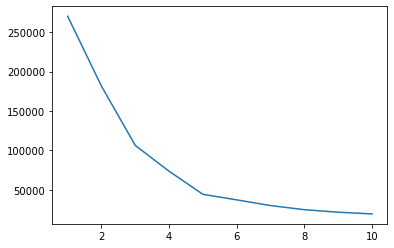

In [43]:
plt.plot(range(1,11), inertia2_cluster)

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

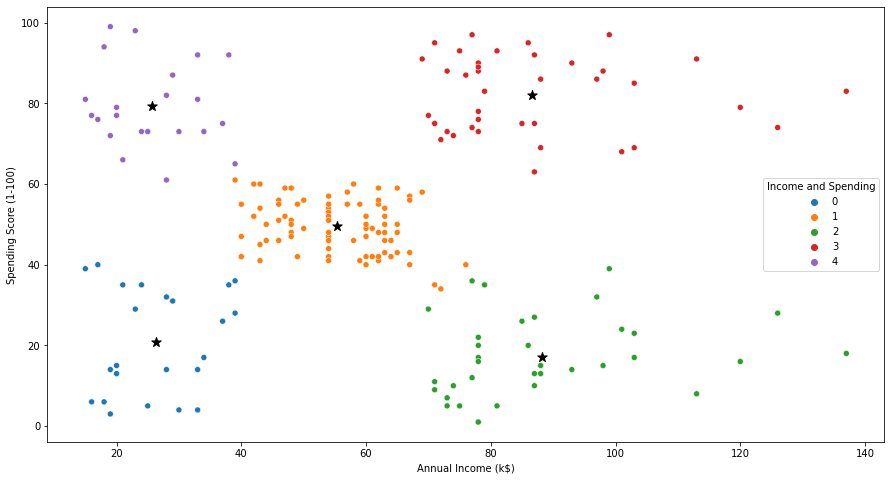

In [44]:
plt.figure(figsize=(15,8))
plt.scatter(x=centers['x'],y=centers['y'],s= 100, color='black',marker='*')
sns.scatterplot(data=customer, x='Annual Income (k$)',y='Spending Score (1-100)',hue='Income and Spending',palette='tab10')

In [45]:
pd.crosstab(customer['Income and Spending'],customer['Gender'], normalize='index')

Gender,Female,Male
Income and Spending,,
0,0.608696,0.391304
1,0.592593,0.407407
2,0.457143,0.542857
3,0.538462,0.461538
4,0.590909,0.409091


In [46]:
customer.groupby('Income and Spending')['Age', 'Annual Income (k$)', 'Spending Score (1-100)'].mean()

/var/folders/4p/strpkrbd1y782g01xksphyv40000gn/T/ipykernel_25193/3323413992.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  customer.groupby('Income and Spending')['Age', 'Annual Income (k$)', 'Spending Score (1-100)'].mean()


,Age,Annual Income (k$),Spending Score (1-100)
Income and Spending,,,
0,45.217391,26.304348,20.913043
1,42.716049,55.296296,49.518519
2,41.114286,88.200000,17.114286
3,32.692308,86.538462,82.128205
4,25.272727,25.727273,79.363636


*  We want to focus on cluster 0 that has high annual income and high spending score as this cluster brings the most revenue for our business.
* Interestingly, cluster 4 comprises of young people (around 25) that has low annual income but high spending score. We may want to do some kind of one-time event marketing campaign annually to boost sales for this cluster. 

## MULTIVARIATE CLUSTERING

In [53]:
from sklearn.preprocessing import StandardScaler

In [54]:
scale = StandardScaler()

In [55]:
cust=pd.get_dummies(customer,drop_first=True)

In [51]:
cust.head()

,Age,Annual Income (k$),Spending Score (1-100),Income Labels,Income and Spending,Gender_Male
0,19,15,39,1,0,1
1,21,15,81,1,4,1
2,20,16,6,1,0,0
3,23,16,77,1,4,0
4,31,17,40,1,0,0


In [56]:
cust.columns

Index(['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Income Labels',
       'Income and Spending', 'Gender_Male'],
      dtype='object')

In [58]:
cust = pd.DataFrame(scale.fit_transform(cust))

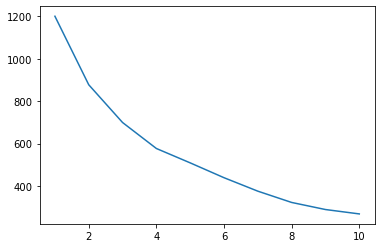

In [62]:
inertia3_cluster =[]
for i in range(1,11):
    kmeans3 = KMeans(n_clusters=i)
    kmeans3.fit(cust)
    inertia3_cluster.append(kmeans3.inertia_)
plt.plot(range(1,11), inertia3_cluster)

In [63]:
# The knee-locator map above doesn't indicate a certain value of n-clusters, so we'd use the results generated
# in Bivariate Analysis for this business problems. 